In [1]:
from datasets import load_dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from collections import OrderedDict
from commons import colors_per_setup_training, small_font_size, medium_font_size, large_font_size

import seaborn
seaborn.set_context("paper", font_scale=1.9)
seaborn.set_style("whitegrid")

In [2]:
data = load_dataset("csv", data_files="../raw_data/influence_of_training_data.csv", split="train")

Using custom data configuration default-78fe9711fdeffc1c
Reusing dataset csv (/home/teven/.cache/huggingface/datasets/csv/default-78fe9711fdeffc1c/0.0.0/50d3f5d1aef1732094f95566e0c67506165deea4ff693f78b1a17588fb6bc108)


In [3]:
data = data.map(None, remove_columns=[column_name for column_name in data.column_names if "_step" in column_name or "MIN" in column_name or "MAX" in column_name])

Loading cached processed dataset at /home/teven/.cache/huggingface/datasets/csv/default-78fe9711fdeffc1c/0.0.0/50d3f5d1aef1732094f95566e0c67506165deea4ff693f78b1a17588fb6bc108/cache-07e1f84d9605d5f9.arrow


In [4]:
data.column_names

['data_points',
 'trex_bs192_hardneg - WebNLG_recall@1',
 'tekgen_bs192_hardneg - WebNLG_recall@1',
 'kelm_bs192_hardneg - WebNLG_recall@1',
 'all_bs192_hardneg - WebNLG_recall@1',
 'trex_bs320_batchneg - WebNLG_recall@1',
 'tekgen_bs320_batchneg - WebNLG_recall@1',
 'kelm_bs320_batchneg - WebNLG_recall@1',
 'all_bs320_batchneg - WebNLG_recall@1',
 'trex_bs2560_hardneg - WebNLG_recall@1',
 'tekgen_bs2560_hardneg - WebNLG_recall@1',
 'kelm_bs2560_hardneg - WebNLG_recall@1',
 'all_bs2560_hardneg - WebNLG_recall@1',
 'baseline - WebNLG_recall@1']

In [5]:
models = [model_name.split()[0] for model_name in data.column_names[1:]]

In [6]:
models

['trex_bs192_hardneg',
 'tekgen_bs192_hardneg',
 'kelm_bs192_hardneg',
 'all_bs192_hardneg',
 'trex_bs320_batchneg',
 'tekgen_bs320_batchneg',
 'kelm_bs320_batchneg',
 'all_bs320_batchneg',
 'trex_bs2560_hardneg',
 'tekgen_bs2560_hardneg',
 'kelm_bs2560_hardneg',
 'all_bs2560_hardneg',
 'baseline']

In [7]:
performance_per_model = OrderedDict([(model, []) for model in sorted(models) if model != "baseline"] + [("baseline", [])])
for example in data:
    data_points = example.pop("data_points")
    for model_name, perf in example.items():
        if perf is not None:
            performance_per_model[model_name.split()[0]].append((data_points, perf))

In [8]:
performance_per_model

OrderedDict([('all_bs192_hardneg',
              [(384000, 0.7340845465660095),
               (768000, 0.768756628036499),
               (1152000, 0.7830106616020203),
               (1536000, 0.7852258682250977),
               (1920000, 0.7888856530189514),
               (2304000, 0.7933160066604614),
               (2688000, 0.7950496077537537),
               (3072000, 0.7970721125602722),
               (3456000, 0.7962053418159485),
               (3840000, 0.7989020347595215),
               (4224000, 0.7974573969841003),
               (4608000, 0.8018876910209656),
               (4992000, 0.8022729754447937),
               (5376000, 0.8028508424758911),
               (5760000, 0.8075700402259827),
               (6144000, 0.8001540899276733),
               (6528000, 0.8020803332328796),
               (6912000, 0.8058364391326904),
               (7296000, 0.8056438565254211),
               (7680000, 0.8038139343261719),
               (8064000, 0.80535489320755),
    

/home/teven/virtualenvs/dev_transformers/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/teven/virtualenvs/dev_transformers/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/teven/virtualenvs/dev_transformers/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

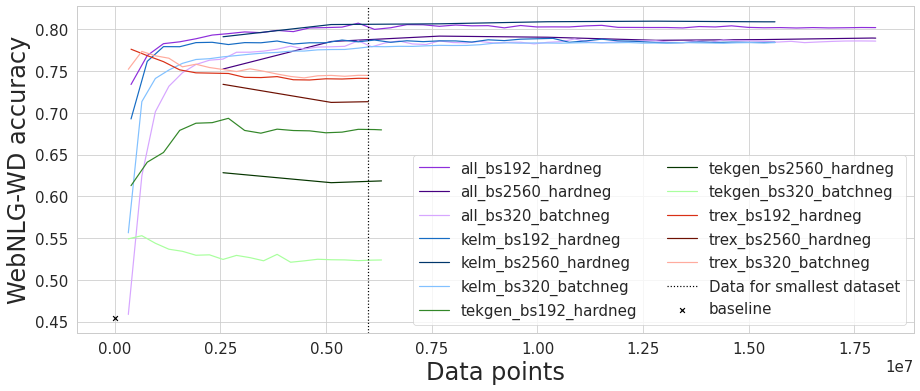

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))

limit_of_data = min([max([item[0] for item in perfs]) for perfs in list(performance_per_model.values())[:-1]])

for model, perfs in list(performance_per_model.items())[:-1]:
    x, y = zip(*perfs)
    seaborn.lineplot(x, y, label=model, color=colors_per_setup_training[model])
    
ax.scatter(performance_per_model["baseline"][0][0], performance_per_model["baseline"][0][1], marker="x", color="black", label="baseline")
ax.axvline(limit_of_data, color="black", alpha=1, ls=':', label=f"Data for smallest dataset")
ax.set_xlabel("Data points", fontsize=medium_font_size)
ax.set_ylabel("WebNLG-WD accuracy", fontsize=medium_font_size)
ax.tick_params(axis='both', which='major', labelsize=small_font_size)
ax.tick_params(axis='both', which='minor', labelsize=small_font_size)
t = ax.xaxis.get_offset_text()
t.set_size(small_font_size)
# fig.suptitle('Evaluation performance throughout training', fontsize=20)

ax.legend(fontsize=15, ncol=2)